# Gradient Descent.

### Basic Gradient

The general parameter update rule in gradient descent is:

$$
\theta_{t+1} = \theta_t - \eta \cdot \nabla_\theta J(\theta_t)
$$

Where:

- $\theta_t$: Parameters at iteration $t$
- $\eta$: Learning rate
- $\nabla_\theta J(\theta_t)$: Gradient of cost function $J$ w.r.t $\theta$ at $\theta_t$

### Stochastic Gradient Descent (SGD)

For a single training example $(x^{(i)}, y^{(i)})$:

$$
\theta_{t+1} = \theta_t - \eta \cdot \nabla_\theta J(\theta_t; x^{(i)}, y^{(i)})
$$

### Mini-batch Gradient Descent

For a mini-batch of size $m$:

$$
\theta_{t+1} = \theta_t - \eta \cdot \frac{1}{m} \sum_{i=1}^m \nabla_\theta J(\theta_t; x^{(i)}, y^{(i)})
$$


In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

### Example Equation.

$$
f(x,y) =
3(1 - x)^2 e^{-(x^2 + (y + 1)^2)}
- 10\left(\frac{x}{5} - x^3 - y^5\right) e^{-(x^2 + y^2)}
- \frac{1}{3} e^{-((x + 1)^2 + y^2)}
$$


In [2]:
x, y = sym.symbols("x y")

Z = (
    3 * (1 - x) ** 2 * sym.exp(-(x**2) - (y + 1) ** 2)
    - 10 * (x / 5 - x**3 - y**5) * sym.exp(-(x**2) - y**2)
    - 1 / 3 * sym.exp(-((x + 1) ** 2) - y**2)
)

Zfx = sym.lambdify((x, y), Z)
df_x = sym.lambdify((x, y), sym.diff(Z, x))
df_y = sym.lambdify((x, y), sym.diff(Z, y))

xx = np.linspace(-3, 3, 101)
X, Y = np.meshgrid(xx, xx)

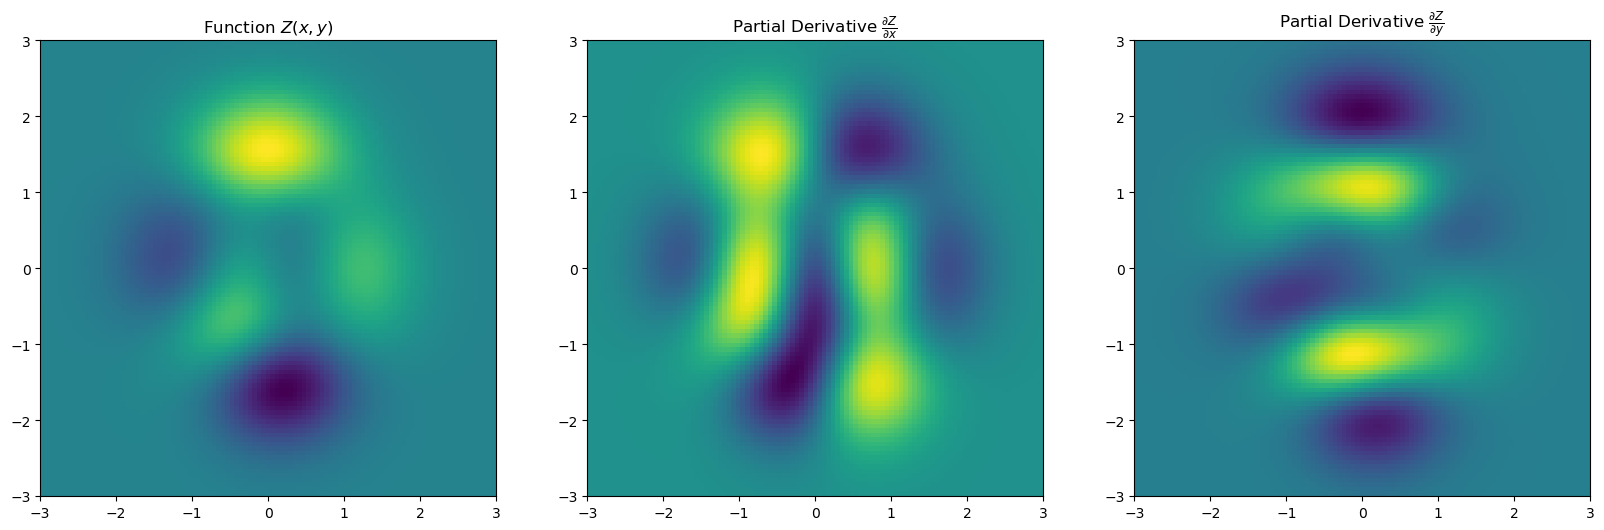

In [3]:
_, axes = plt.subplots(1, 3, figsize=(20, 6))  # Increase figure size

axes[0].imshow(
    Zfx(X, Y),
    extent=[xx[0], xx[-1], xx[0], xx[-1]],
    origin="lower",
    cmap="viridis",
)
axes[0].set_title("Function $Z(x, y)$")

axes[1].imshow(
    df_x(X, Y),
    extent=[xx[0], xx[-1], xx[0], xx[-1]],
    origin="lower",
    cmap="viridis",
)
axes[1].set_title("Partial Derivative $\\frac{\\partial Z}{\\partial x}$")

axes[2].imshow(
    df_y(X, Y),
    extent=[xx[0], xx[-1], xx[0], xx[-1]],
    origin="lower",
    cmap="viridis",
)
axes[2].set_title("Partial Derivative $\\frac{\\partial Z}{\\partial y}$")

plt.show()

### Implementation of Gradient Descent.


In [4]:
epochs = 1000
learning_rate = 0.01
# just a random starting point in the upper function area
local_min = np.random.rand(2) * 4 - 2
start_point = local_min[:]
# store the epoch times, x and y coordinates
trajectory = np.zeros((epochs, 2))

for i in range(epochs):
    gradient = np.array(
        [
            df_x(local_min[0], local_min[1]),
            df_y(local_min[0], local_min[1]),
        ]
    )
    local_min = local_min - learning_rate * gradient
    trajectory[i, :] = local_min

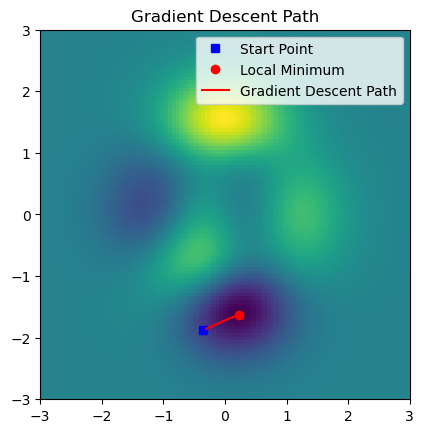

In [5]:
plt.imshow(
    Zfx(X, Y),
    extent=[xx[0], xx[-1], xx[0], xx[-1]],
    origin="lower",
    cmap="viridis",
)
plt.title("Gradient Descent Path")

plt.plot(start_point[0], start_point[1], "bs", label="Start Point")
plt.plot(local_min[0], local_min[1], "ro", label="Local Minimum")
# line
plt.plot(
    trajectory[:, 0],
    trajectory[:, 1],
    "r",
    label="Gradient Descent Path",
)

plt.legend()
plt.show()

### Implementation the Gradient Ascent.


In [9]:
epochs = 1000
learning_rate = 0.01
# just a random starting point in the upper function area
local_min = np.random.rand(2) * 4 - 2
start_point = local_min[:]
# store the epoch times, x and y coordinates
trajectory = np.zeros((epochs, 2))

for i in range(epochs):
    gradient = np.array(
        [
            df_x(local_min[0], local_min[1]),
            df_y(local_min[0], local_min[1]),
        ]
    )
    local_min = local_min + learning_rate * gradient
    trajectory[i, :] = local_min

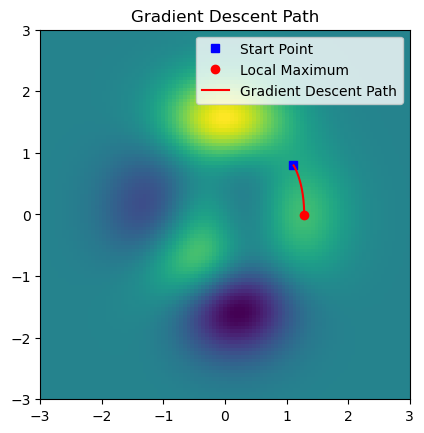

In [10]:
plt.imshow(
    Zfx(X, Y),
    extent=[xx[0], xx[-1], xx[0], xx[-1]],
    origin="lower",
    cmap="viridis",
)
plt.title("Gradient Descent Path")

plt.plot(start_point[0], start_point[1], "bs", label="Start Point")
plt.plot(local_min[0], local_min[1], "ro", label="Local Maximum")
# line
plt.plot(
    trajectory[:, 0],
    trajectory[:, 1],
    "r",
    label="Gradient Descent Path",
)

plt.legend()
plt.show()